In [1528]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')


# Introduction   
I like chocolate, so I'll explore the world of chocolate and see what interesting findings are there 🍫

# Objectives 
1. What are influences a chocolates' rating ? 
2. Where top notch chocolate are produced and where are they grown ? 
3. which countries are the biggest importer and how they performed throughout the year ?

# Table of Content
1. [Introduction](#Introduction) 
2. [Data Exploration & Cleaning](#Data-Exploration-and-Cleaning)
3. [Data Analysis](#Data-Analysis) 
4. [Reference](#Reference:) 


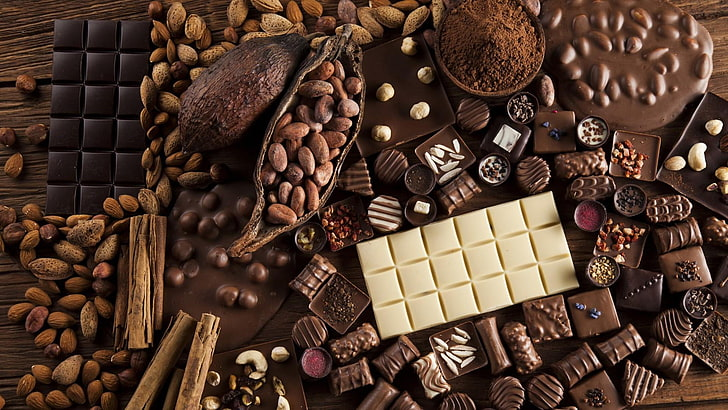

## Chocolate Bar Ratings

Flavors of Cacao Rating System:

5 = Elite (Transcending beyond the ordinary limits)

4 = Premium (Superior flavor development, character and style)

3 = Satisfactory(3.0) to praiseworthy(3.75) (well made with special qualities)

2 = Disappointing (Passable but contains at least one significant flaw)

1 = Unpleasant (mostly unpalatable)

## Data description
- Company (Maker-if known) = Name of the company manufacturing the bar.

- Specific Bean Origin or Bar Name = The specific location of the chocolate bar's origin.

- REF = Review Update Value.

- Review Date = Date of publication of the review.

- Cocoa Percent = How much cocoa contain with a bar. 

- Company Location = Which country a manufacturer is based in.

- Rating = How well the chocolate bar was received .

- Bean Type = The type of bean/beans used for the bar.

- Broad Bean Origin = The general location of the bean's origin.


# Data Exploration and Cleaning

In [1531]:
# load the csv
df = pd.read_csv('flavors_of_cacao.csv')
df.head()

,Company \n(Maker-if known),Specific Bean Origin\nor Bar Name,REF,Review\nDate,Cocoa\nPercent,Company\nLocation,Rating,Bean\nType,Broad Bean\nOrigin
0,A. Morin,Agua Grande,1876,2016,63%,France,3.75,,Sao Tome
1,A. Morin,Kpime,1676,2015,70%,France,2.75,,Togo
2,A. Morin,Atsane,1676,2015,70%,France,3.00,,Togo
3,A. Morin,Akata,1680,2015,70%,France,3.50,,Togo
4,A. Morin,Quilla,1704,2015,70%,France,3.50,,Peru


In [1532]:
#Modify data column name to be more readable 
 
rename = {
     df.columns[0]: 'company',
    'Specific Bean Origin\nor Bar Name': 'specific_bean_origin',
    'REF': 'review_update_value',
    'Review\nDate': 'review_date',
    'Cocoa\nPercent': 'cocoa_percentage',
    'Company\nLocation': 'company_location',
    'Rating': 'rating',
    'Bean\nType': 'bean_type',
    'Broad Bean\nOrigin': 'bean_origin'
}
df = df.rename(rename, axis='columns')
df.head()

,company,specific_bean_origin,review_update_value,review_date,cocoa_percentage,company_location,rating,bean_type,bean_origin
0,A. Morin,Agua Grande,1876,2016,63%,France,3.75,,Sao Tome
1,A. Morin,Kpime,1676,2015,70%,France,2.75,,Togo
2,A. Morin,Atsane,1676,2015,70%,France,3.00,,Togo
3,A. Morin,Akata,1680,2015,70%,France,3.50,,Togo
4,A. Morin,Quilla,1704,2015,70%,France,3.50,,Peru


In [1533]:
df.dtypes

company                  object
specific_bean_origin     object
review_update_value       int64
review_date               int64
cocoa_percentage         object
company_location         object
rating                  float64
bean_type                object
bean_origin              object
dtype: object

- cocoa_percentage should be int not object
- So we need to remove % 

In [1535]:
df['cocoa_percentage'] = df['cocoa_percentage'].str.replace('%', '').astype(float)


In [1536]:
# Check for duplicate and missing values 
duplicate_count = df.duplicated().sum()
print("Number of Duplicate Rows:", duplicate_count)
rows_with_missing_values = df[df.isnull().any(axis=1)]
missing_rows_df = df[df.isnull().any(axis=1)].reset_index(drop=True)
display(missing_rows_df)

Number of Duplicate Rows: 0


,company,specific_bean_origin,review_update_value,review_date,cocoa_percentage,company_location,rating,bean_type,bean_origin
0,Mast Brothers,Madagascar,999,2012,72.0,U.S.A.,2.5,Trinitario,NaN
1,Soma,"Three Amigos(Chuao, Wild Bolivia, D.R.)",676,2011,70.0,Canada,4.0,NaN,"Ven, Bolivia, D.R."


- Missing values found, two rows
- Three Amigos produced by Soma has a bean_type that's blend of Chuao, Wild Bolivia, D.R 

In [1538]:
# Replace the NaN value with "Chuao, Wild Bolivia, D.R"
df['bean_type'].fillna('Chuao, Wild Bolivia, D.R', inplace=True)

In [1539]:
# Filter rows where 'specific_bean_origin' is 'Madagascar' and 'bean_type' is 'Trinitario'
filtered_rows = df[(df['specific_bean_origin'] == 'Madagascar') & (df['bean_type'] == 'Trinitario')]
display(filtered_rows)

,company,specific_bean_origin,review_update_value,review_date,cocoa_percentage,company_location,rating,bean_type,bean_origin
37,Alain Ducasse,Madagascar,1215,2014,75.0,France,3.00,Trinitario,Madagascar
60,Amano,Madagascar,129,2007,70.0,U.S.A.,3.50,Trinitario,Madagascar
70,Ambrosia,Madagascar,1494,2015,66.0,Canada,3.25,Trinitario,Madagascar
95,Ara,Madagascar,1375,2014,75.0,France,3.00,Trinitario,Madagascar
183,Beschle (Felchlin),Madagascar,636,2011,64.0,Switzerland,3.00,Trinitario,Madagascar
220,Blue Bandana,Madagascar,911,2012,70.0,U.S.A.,3.75,Trinitario,Madagascar
244,Bonnat,Madagascar,75,2006,75.0,France,4.00,Trinitario,Madagascar
309,Cacao Sampaka,Madagascar,508,2010,71.0,Spain,3.50,Trinitario,Madagascar
317,Cacao Store,Madagascar,1684,2015,70.0,Japan,3.00,Trinitario,Madagascar
390,Chocola'te,Madagascar,647,2011,70.0,U.S.A.,3.75,Trinitario,Madagascar


- We can identify that Trinitario comes from Madagascar
- So now we replace NaN with Madagascar 

In [1541]:
df['bean_origin'].fillna('Madagascar', inplace=True)

In [1542]:
# Check for duplicate and missing values 
duplicate_count = df.duplicated().sum()
print("Number of Duplicate Rows:", duplicate_count)
rows_with_missing_values = df[df.isnull().any(axis=1)]
missing_rows_df = df[df.isnull().any(axis=1)].reset_index(drop=True)
display(missing_rows_df)

Number of Duplicate Rows: 0


,company,specific_bean_origin,review_update_value,review_date,cocoa_percentage,company_location,rating,bean_type,bean_origin


- Missing values and duplicate not found

In [1544]:
df

,company,specific_bean_origin,review_update_value,review_date,cocoa_percentage,company_location,rating,bean_type,bean_origin
0,A. Morin,Agua Grande,1876,2016,63.0,France,3.75,,Sao Tome
1,A. Morin,Kpime,1676,2015,70.0,France,2.75,,Togo
2,A. Morin,Atsane,1676,2015,70.0,France,3.00,,Togo
3,A. Morin,Akata,1680,2015,70.0,France,3.50,,Togo
4,A. Morin,Quilla,1704,2015,70.0,France,3.50,,Peru
5,A. Morin,Carenero,1315,2014,70.0,France,2.75,Criollo,Venezuela
6,A. Morin,Cuba,1315,2014,70.0,France,3.50,,Cuba
7,A. Morin,Sur del Lago,1315,2014,70.0,France,3.50,Criollo,Venezuela
8,A. Morin,Puerto Cabello,1319,2014,70.0,France,3.75,Criollo,Venezuela
9,A. Morin,Pablino,1319,2014,70.0,France,4.00,,Peru


In [1545]:
# bean_type has empty string 
empty_string_count_bean_type = (df['bean_type'].str.strip() == '').sum()

# Display the result
print("Number of empty strings in 'bean_type' column:")
print(empty_string_count_bean_type)


Number of empty strings in 'bean_type' column:
887


In [1546]:
(887/1795)*100

49.41504178272981

- 49% of bean_type is missing, we'll deal with it later 

- Check bean_origin for misspelling

In [1549]:
# Show unique values in bean_origin column
unique_values = df['bean_origin'].unique()
print("Unique Values in 'bean_origin' column:")
print(unique_values)

Unique Values in 'bean_origin' column:
['Sao Tome' 'Togo' 'Peru' 'Venezuela' 'Cuba' 'Panama' 'Madagascar'
 'Brazil' 'Ecuador' 'Colombia' 'Burma' 'Papua New Guinea' 'Bolivia' 'Fiji'
 'Mexico' 'Indonesia' 'Trinidad' 'Vietnam' 'Nicaragua' 'Tanzania'
 'Dominican Republic' 'Ghana' 'Belize' '\xa0' 'Jamaica' 'Grenada'
 'Guatemala' 'Honduras' 'Costa Rica' 'Domincan Republic' 'Haiti' 'Congo'
 'Philippines' 'Malaysia' 'Dominican Rep., Bali'
 'Venez,Africa,Brasil,Peru,Mex' 'Gabon' 'Ivory Coast' 'Carribean'
 'Sri Lanka' 'Puerto Rico' 'Uganda' 'Martinique' 'Sao Tome & Principe'
 'Vanuatu' 'Australia' 'Liberia' 'Ecuador, Costa Rica' 'West Africa'
 'Hawaii' 'St. Lucia' 'Cost Rica, Ven' 'Peru, Madagascar'
 'Venezuela, Trinidad' 'Trinidad, Tobago' 'Ven, Trinidad, Ecuador'
 'South America, Africa' 'India' 'Africa, Carribean, C. Am.' 'Tobago'
 'Ven., Indonesia, Ecuad.' 'Trinidad-Tobago' 'Peru, Ecuador, Venezuela'
 'Venezuela, Dom. Rep.' 'Colombia, Ecuador' 'Solomon Islands' 'Nigeria'
 'Peru, Belize' 'Per

- There are several misspellings, abbrevations and provinces found (should be country) so we need to change them accordingly 


In [1551]:
# Correct the misspelling for the countries and replace unnecassary symbols
# Bali is a province in Indonesia so replace with it (apply this for other values)
# Martinique is a french territory 

import re

def txt_prep(text):
    replacements = [
        [', $', ''], [',  ', ', '], [', ,', ', '], ['\xa0', ' '], [',\s+', ','],['\.', ''],
        ['and', '&'],
        [' Bali|Bali|Java', ',Indonesia'],
        ['Brasil', 'Brazil'],
        ['Hawaii', 'USA'],
        ['C Am|C. Am.', 'Central America'],
        ['Carribean','Caribbean'],
        ['Cost Rica', 'Costa Rica'],
        ['Dom Rep|Dom. Rep.|DR|D.R|Domin Rep|Dominican Rep,|Domincan Republic', 'Dominican Republic'],
        ['Ecu,|Ecu$|Ecuad,|Ecuad$', 'Ecuador,'],
        ['Gre,|Gre$', 'Grenada,'],
        ['Guat,|Guat$', 'Guatemala,'],
        ['Haw,|Haw$', 'Hawaii,'],
        ['Jam,|Jam$', 'Jamaica,'],
        ['Mad,|Mad$', 'Madagascar,'],
        ['Mex,|Mex$', 'Mexico'],
        ['Nic,|Nic$', 'Nicaragua,'],
        ['PNG', 'Papua New Guinea'],
        ['S America|S. America', 'South America'],
        ['Tri,|Tri$', 'Trinidad,'],
        ['Ven,|Ven$|Venez,|Venez$|Venezuela/', 'Venezuela,'],
        ['Ug&a', 'Uganda'],
        ['Solomon Isl&s', 'Solomon Islands'],
        ['Peru(SMartin,Pangoa,nacional)', 'Peru']
        

    ]
    for replacement in replacements:
        text = re.sub(replacement[0], replacement[1], text)
        
    if text.endswith(' '):
        text = text.rstrip(' ')
        
    text = re.sub(r',+', ',', text)
    
    # Check if the string ends with a comma and remove it
    if text.endswith(','):
        text = text.rstrip(',')
        
    matches = re.findall(r'([A-Za-z ]+)\(([^)]+)\)', text)
    for match in matches:
        countries = match[1].split('/')
        replacement = ','.join(countries)
        text = text.replace(f"{match[0]}({match[1]})", replacement)
   
    text = re.sub(r'SMartin,Pangoa,nacional', 'Peru', text)
    text = re.sub(r'Dominican Republic,Jam,Tri','Dominican Republic,Jamaica,Trinidad', text)
    text = re.sub(r'Madagascar & Ecuador','Madagascar,Ecuador', text)
    text = re.sub(r'Ghana & Madagascar','Ghana,Madagascar', text)
    text = re.sub(r'Central & South America','Central America,South America', text)
    text = re.sub(r'Trinidad-Tobago','Trinidad,Tobago', text)
    text = re.sub(r'Venezuela, Ghana','Venezuela,Ghana', text)
    
    
    return text

# Apply the function to the 'bean_origin' column
df['bean_origin'] = df['bean_origin'].apply(lambda x: txt_prep(x))
unique_values = df['bean_origin'].unique()

# Display the unique values
print("Unique Values in 'bean_origin' column:")
print(unique_values)


Unique Values in 'bean_origin' column:
['Sao Tome' 'Togo' 'Peru' 'Venezuela' 'Cuba' 'Panama' 'Madagascar'
 'Brazil' 'Ecuador' 'Colombia' 'Burma' 'Papua New Guinea' 'Bolivia' 'Fiji'
 'Mexico' 'Indonesia' 'Trinidad' 'Vietnam' 'Nicaragua' 'Tanzania'
 'Dominican Republic' 'Ghana' 'Belize' '' 'Jamaica' 'Grenada' 'Guatemala'
 'Honduras' 'Costa Rica' 'Haiti' 'Congo' 'Philippines' 'Malaysia'
 'Dominican Republic,Indonesia' 'Venezuela,Africa,Brazil,Peru,Mexico'
 'Gabon' 'Ivory Coast' 'Caribbean' 'Sri Lanka' 'Puerto Rico' 'Uganda'
 'Martinique' 'Sao Tome & Principe' 'Vanuatu' 'Australia' 'Liberia'
 'Ecuador,Costa Rica' 'West Africa' 'USA' 'St Lucia'
 'Costa Rica,Venezuela' 'Peru,Madagascar' 'Venezuela,Trinidad'
 'Trinidad,Tobago' 'Venezuela,Trinidad,Ecuador' 'South America,Africa'
 'India' 'Africa,Caribbean,Central America' 'Tobago'
 'Venezuela,Indonesia,Ecuador' 'Peru,Ecuador,Venezuela'
 'Venezuela,Dominican Republic' 'Colombia,Ecuador' 'Solomon Islands'
 'Nigeria' 'Peru,Belize' 'Peru,Madagasca

In [1552]:
df.head()

,company,specific_bean_origin,review_update_value,review_date,cocoa_percentage,company_location,rating,bean_type,bean_origin
0,A. Morin,Agua Grande,1876,2016,63.0,France,3.75,,Sao Tome
1,A. Morin,Kpime,1676,2015,70.0,France,2.75,,Togo
2,A. Morin,Atsane,1676,2015,70.0,France,3.00,,Togo
3,A. Morin,Akata,1680,2015,70.0,France,3.50,,Togo
4,A. Morin,Quilla,1704,2015,70.0,France,3.50,,Peru


In [1553]:
# Show unique values in bean_type column
unique_values = df['bean_type'].unique()
print("Unique Values in 'bean_type' column:")
print(unique_values)

Unique Values in 'bean_type' column:
['\xa0' 'Criollo' 'Trinitario' 'Forastero (Arriba)' 'Forastero'
 'Forastero (Nacional)' 'Criollo, Trinitario' 'Criollo (Porcelana)'
 'Blend' 'Trinitario (85% Criollo)' 'Forastero (Catongo)'
 'Forastero (Parazinho)' 'Trinitario, Criollo' 'CCN51' 'Criollo (Ocumare)'
 'Nacional' 'Criollo (Ocumare 61)' 'Criollo (Ocumare 77)'
 'Criollo (Ocumare 67)' 'Criollo (Wild)' 'Beniano' 'Amazon mix'
 'Trinitario, Forastero' 'Forastero (Arriba) ASS' 'Criollo, +' 'Amazon'
 'Amazon, ICS' 'EET' 'Blend-Forastero,Criollo' 'Trinitario (Scavina)'
 'Criollo, Forastero' 'Matina' 'Forastero(Arriba, CCN)'
 'Nacional (Arriba)' 'Forastero (Arriba) ASSS' 'Forastero, Trinitario'
 'Forastero (Amelonado)' 'Chuao, Wild Bolivia, D.R' 'Trinitario, Nacional'
 'Trinitario (Amelonado)' 'Trinitario, TCGA' 'Criollo (Amarru)']


- Remove '\xa0'
- Change any name that start with Criollo, Forastero, Trinitario or Nacional 
- ie. Forastero (Arriba) -> Forastero 
- Ignore any inputs with ',' because they're a blend 
- ie. 'Trinitario, Criollo'
- This is to group them together which makes it easier for analysis 

In [1555]:
def update_bean_type(bean_type):
    if bean_type.startswith('Criollo') and ',' not in bean_type:
        return 'Criollo'
    else:
        return bean_type

df['bean_type'] = df['bean_type'].apply(update_bean_type)

def update_bean_type2(bean_type):
    if bean_type.startswith('Forastero') and ',' not in bean_type:
        return 'Forastero'
    else:
        return bean_type

df['bean_type'] = df['bean_type'].apply(update_bean_type2)

def update_bean_type3(bean_type):
    if bean_type.startswith('Trinitario') and ',' not in bean_type:
        return 'Trinitario'
    else:
        return bean_type

df['bean_type'] = df['bean_type'].apply(update_bean_type3)

def update_bean_type4(bean_type):
    if bean_type.startswith('Nacional') and ',' not in bean_type:
        return 'Nacional'
    else:
        return bean_type

df['bean_type'] = df['bean_type'].apply(update_bean_type4)

df['bean_type'] = df['bean_type'].apply(lambda x: ' ' if x.startswith('\xa0') else x)

unique_values = df['bean_type'].unique()
print("Unique Values in 'bean_type' column:")
print(unique_values)

Unique Values in 'bean_type' column:
[' ' 'Criollo' 'Trinitario' 'Forastero' 'Criollo, Trinitario' 'Blend'
 'Trinitario, Criollo' 'CCN51' 'Nacional' 'Beniano' 'Amazon mix'
 'Trinitario, Forastero' 'Criollo, +' 'Amazon' 'Amazon, ICS' 'EET'
 'Blend-Forastero,Criollo' 'Criollo, Forastero' 'Matina'
 'Forastero(Arriba, CCN)' 'Forastero, Trinitario'
 'Chuao, Wild Bolivia, D.R' 'Trinitario, Nacional' 'Trinitario, TCGA']


- This is how it looks after processing

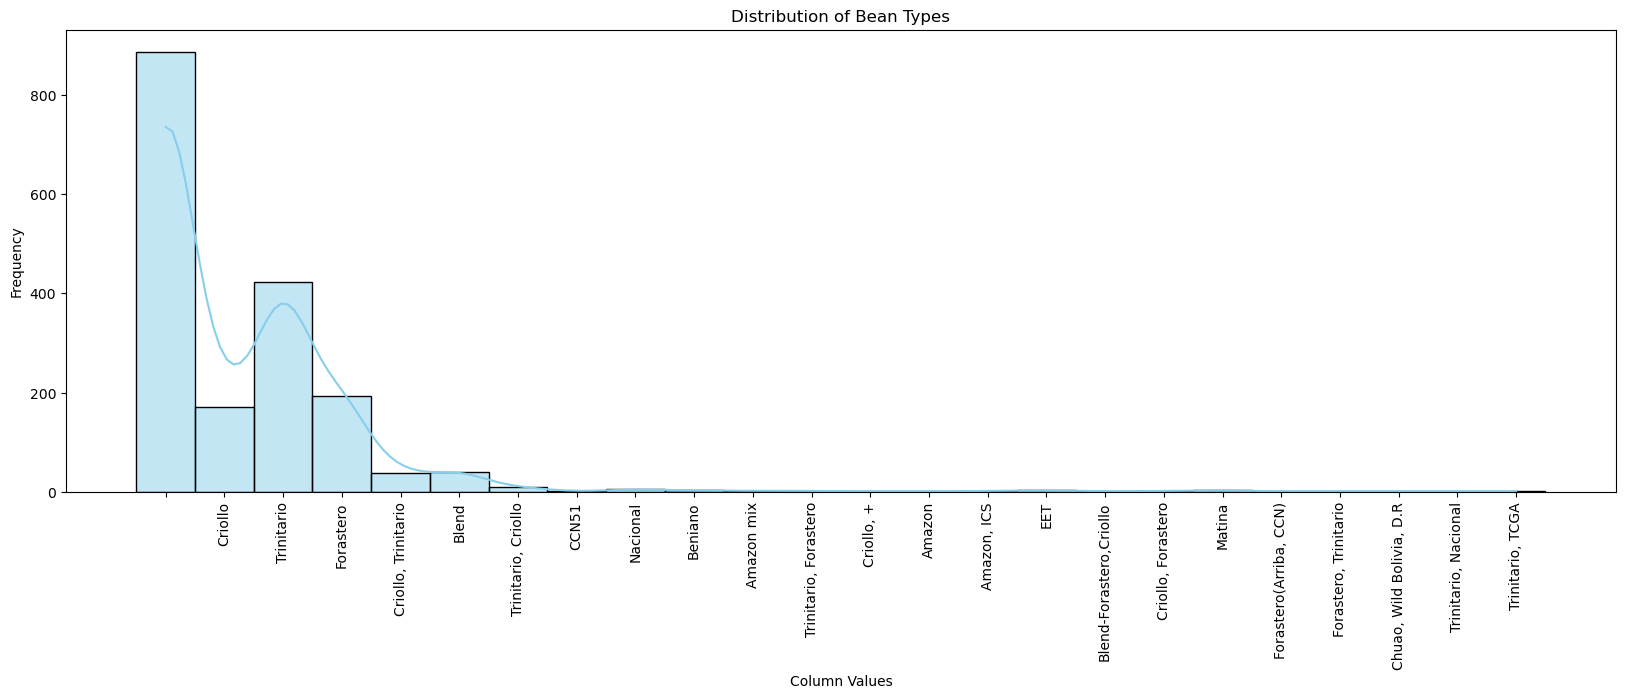

In [1557]:
# Visualize bean_type column 
data = df['bean_type']
plt.figure(figsize=(20, 6))
sns.histplot(data, kde=True, bins=30, color='skyblue')
plt.title('Distribution of Bean Types')
plt.xticks(rotation=90);
plt.xlabel('Column Values')
plt.ylabel('Frequency')
plt.show()

- An empty string has highest occurence in the dataset, let's try to find out what it is


In [1559]:
# Count rows where 'bean_type' is an empty string, handling NaN values
count_empty_bean_type = len(df[df['bean_type'].apply(lambda x: str(x).strip() == '')])
print('Number of rows where bean_type is empty string:')
print(count_empty_bean_type)

Number of rows where bean_type is empty string:
887


In [1560]:
most_common_types = df.groupby('bean_origin')['bean_type'].agg(lambda x: x.mode().iat[0] if not x.mode().empty else '').reset_index()

# Filter out rows where the most common 'bean_type' is empty or whitespace
most_common_types_filtered = most_common_types[~most_common_types['bean_type'].str.isspace()]

# Display the full list in tabular form if filtered 'most_common_types' is not empty
if not most_common_types_filtered.empty:
    print(most_common_types_filtered.to_string(index=False))
else:
    print("No non-empty most common 'bean_type' available.")

                                     bean_origin                bean_type
                                          Belize               Trinitario
                                        Cameroon                Forastero
                                           Congo                Forastero
                                            Cuba               Trinitario
                 Dominican Republic,Ecuador,Peru     Trinitario, Nacional
                    Dominican Republic,Indonesia                    Blend
             Dominican Republic,Jamaica,Trinidad                    Blend
                   Dominican Republic,Madagascar                    Blend
             Ecuador,Madagascar,Papua New Guinea                    Blend
                                            Fiji               Trinitario
                                           Ghana                Forastero
                                Ghana,Madagascar                    Blend
                            Ghana,Pana

- These are the most common bean_type for each bean_origin respectively

In [1562]:
most_common_types = df.groupby('bean_origin')['bean_type'].agg(lambda x: x.mode().iat[0] if not x.mode().empty else '').reset_index()
most_common_types_filtered = most_common_types[~most_common_types['bean_type'].str.isspace()]

# Replace empty or whitespace 'bean_type' with the most common 'bean_type' for their corresponding 'bean_origin'
for index, row in most_common_types_filtered.iterrows():
    mask = (df['bean_origin'] == row['bean_origin']) & (df['bean_type'].str.isspace() | df['bean_type'].eq(''))
    df.loc[mask, 'bean_type'] = row['bean_type']

df.head()

,company,specific_bean_origin,review_update_value,review_date,cocoa_percentage,company_location,rating,bean_type,bean_origin
0,A. Morin,Agua Grande,1876,2016,63.0,France,3.75,Forastero,Sao Tome
1,A. Morin,Kpime,1676,2015,70.0,France,2.75,,Togo
2,A. Morin,Atsane,1676,2015,70.0,France,3.00,,Togo
3,A. Morin,Akata,1680,2015,70.0,France,3.50,,Togo
4,A. Morin,Quilla,1704,2015,70.0,France,3.50,,Peru


- We try to replace empty value in bean_type with the most common bean_type associated with their bean_origin 
- If Togo's most common bean_type is Criollo, we can assume the empty value is Criollo and we can replace it accordingly 
- If most common bean_type associated with a bean_origin is empty, then we will replace it with 'Blend' later

In [1564]:
# Check if there are still empty string in bean_type
rows_with_empty_string = df[df['bean_type'].apply(lambda x: x.strip() == '')]
rows_with_empty_string.head()

,company,specific_bean_origin,review_update_value,review_date,cocoa_percentage,company_location,rating,bean_type,bean_origin
1,A. Morin,Kpime,1676,2015,70.0,France,2.75,,Togo
2,A. Morin,Atsane,1676,2015,70.0,France,3.00,,Togo
3,A. Morin,Akata,1680,2015,70.0,France,3.50,,Togo
4,A. Morin,Quilla,1704,2015,70.0,France,3.50,,Peru
9,A. Morin,Pablino,1319,2014,70.0,France,4.00,,Peru


In [1565]:
# Count rows where 'bean_type' is an empty string (ignoring NaN)
count_empty_bean_type = len(df[df['bean_type'].apply(lambda x: str(x).strip() == '')])

print(f'Number of rows where bean_type is an empty string: {count_empty_bean_type}')


Number of rows where bean_type is an empty string: 856


- Empty string in bean_type is reduced from 887 to 856

In [1567]:
df['bean_type'] = df['bean_type'].apply(lambda x: 'Blend' if x.isspace() or x == '' else x)
df.head()

,company,specific_bean_origin,review_update_value,review_date,cocoa_percentage,company_location,rating,bean_type,bean_origin
0,A. Morin,Agua Grande,1876,2016,63.0,France,3.75,Forastero,Sao Tome
1,A. Morin,Kpime,1676,2015,70.0,France,2.75,Blend,Togo
2,A. Morin,Atsane,1676,2015,70.0,France,3.00,Blend,Togo
3,A. Morin,Akata,1680,2015,70.0,France,3.50,Blend,Togo
4,A. Morin,Quilla,1704,2015,70.0,France,3.50,Blend,Peru


- Replaced the remaining empty values in bean_type with 'Blend'

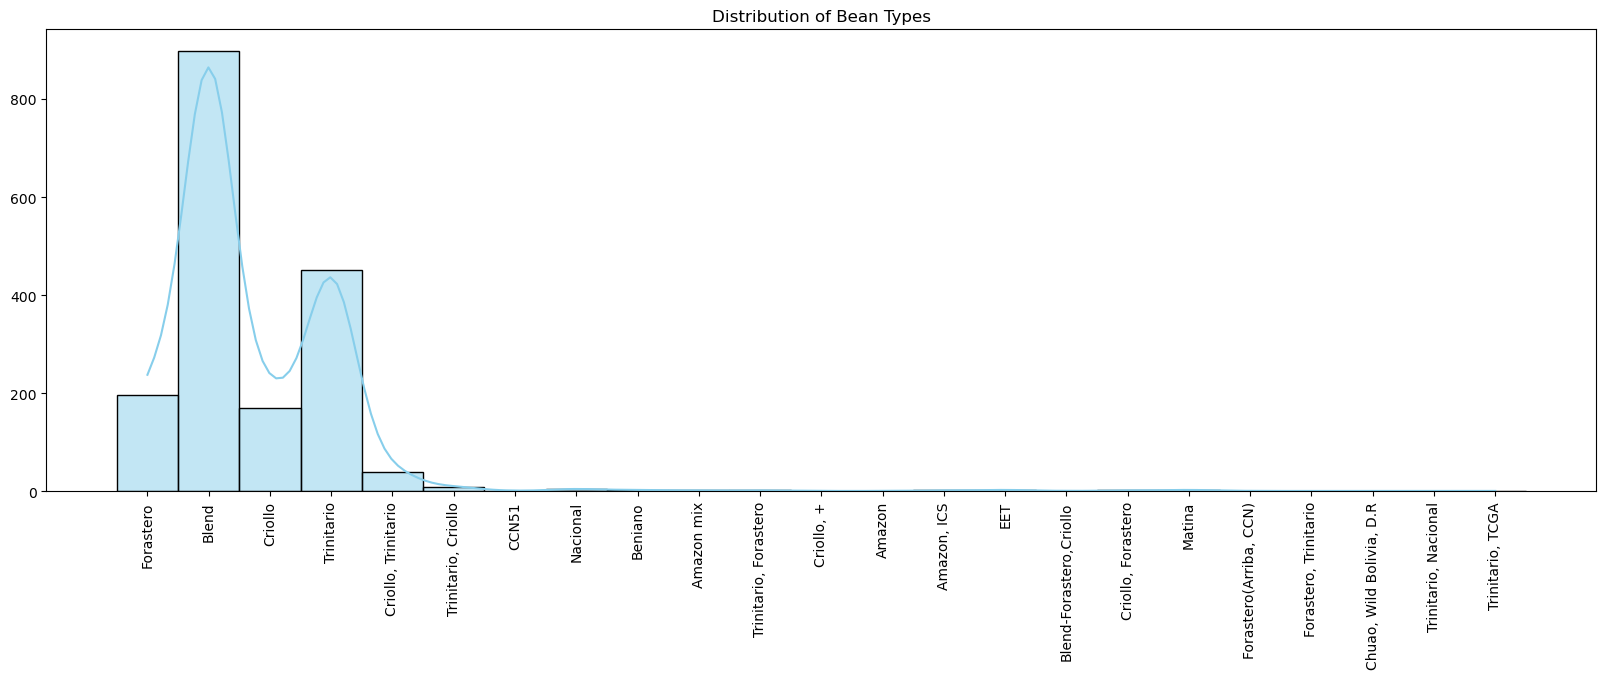

In [1569]:
#Visualise bean_type column
data = df['bean_type']
plt.figure(figsize=(20, 6))
sns.histplot(data, kde=True, bins=30, color='skyblue')
plt.title('Distribution of Bean Types')
plt.xticks(rotation=90);
plt.xlabel('')
plt.ylabel('')
plt.show()

In [1570]:
# Display empty string in bean_origin column
rows_with_empty_string = df[df['bean_origin'].apply(lambda x: x.strip() == '')]
(rows_with_empty_string)

,company,specific_bean_origin,review_update_value,review_date,cocoa_percentage,company_location,rating,bean_type,bean_origin
77,Amedei,Nine,111,2007,75.0,Italy,4.00,Blend,
85,Amedei,Toscano Black,170,2007,63.0,Italy,3.50,Blend,
86,Amedei,Toscano Black,40,2006,70.0,Italy,5.00,Blend,
87,Amedei,Toscano Black,75,2006,66.0,Italy,4.00,Blend,
144,Bahen & Co.,Houseblend,1474,2015,80.0,Australia,3.25,Blend,
148,Bahen & Co.,Houseblend,999,2012,70.0,Australia,2.50,Blend,
182,Bernachon,Nature,797,2012,55.0,France,2.75,Blend,
214,Blanxart,Organic Dark,322,2009,72.0,Spain,2.75,Blend,
245,Bonnat,One Hundred,81,2006,100.0,France,1.50,Blend,
277,Burnt Fork Bend,Blend,1303,2014,72.0,U.S.A.,3.25,Blend,


In [1571]:
# Display he most common bean_type for each unique bean_origin
most_common_types = df.groupby('bean_origin')['bean_type'].agg(lambda x: x.mode().iat[0]).reset_index()
print(most_common_types.to_string(index=False))

                                                  bean_origin                bean_type
                                                                                 Blend
                             Africa,Caribbean,Central America                    Blend
                                                    Australia                    Blend
                                                       Belize               Trinitario
                                                      Bolivia                    Blend
                                                       Brazil                    Blend
                                                        Burma                    Blend
                                                     Cameroon                Forastero
                                                    Caribbean                    Blend
                                Central America,South America                    Blend
                                           

In [1572]:
# Display the most common bean_origin for each specific_bean_origin
most_common_origins = df.groupby('specific_bean_origin')['bean_origin'].agg(lambda x: x.mode().iat[0]).reset_index()
print(most_common_origins.to_string(index=False))

                         specific_bean_origin                                                   bean_origin
                  "heirloom", Arriba Nacional                                                       Ecuador
                                  100 percent                                                              
                              2009 Hapa Nibby                                  Dominican Republic,Indonesia
     A case of the Xerces Blues, triple roast                                                     Nicaragua
                                  ABOCFA Coop                                                         Ghana
                                       Abinao                                                   West Africa
 Abstract S. w/ Jamaica nibs,batch abs60323.0                              Venezuela,Ecuador,Peru,Nicaragua
                            Acarigua, w/ nibs                                                       Ecuador
                            

In [1573]:
# Replace missing or empty bean_origin values with the most common values for each specific_bean_origin.
empty_mask = df['bean_origin'].apply(lambda x: x.isspace() if isinstance(x, str) else x == '')
empty_specific_bean_origins = df.loc[empty_mask, 'specific_bean_origin'].unique()

most_common_origins = df.groupby('specific_bean_origin')['bean_origin'].agg(lambda x: x.mode().iat[0] if not x.mode().empty else '').reset_index()
df['bean_origin'] = df.apply(lambda row: most_common_origins.loc[most_common_origins['specific_bean_origin'] == row['specific_bean_origin'], 'bean_origin'].iat[0] if row['specific_bean_origin'] in empty_specific_bean_origins and not most_common_origins.empty else row['bean_origin'], axis=1)
df.head(10)

,company,specific_bean_origin,review_update_value,review_date,cocoa_percentage,company_location,rating,bean_type,bean_origin
0,A. Morin,Agua Grande,1876,2016,63.0,France,3.75,Forastero,Sao Tome
1,A. Morin,Kpime,1676,2015,70.0,France,2.75,Blend,Togo
2,A. Morin,Atsane,1676,2015,70.0,France,3.00,Blend,Togo
3,A. Morin,Akata,1680,2015,70.0,France,3.50,Blend,Togo
4,A. Morin,Quilla,1704,2015,70.0,France,3.50,Blend,Peru
5,A. Morin,Carenero,1315,2014,70.0,France,2.75,Criollo,Venezuela
6,A. Morin,Cuba,1315,2014,70.0,France,3.50,Trinitario,Cuba
7,A. Morin,Sur del Lago,1315,2014,70.0,France,3.50,Criollo,Venezuela
8,A. Morin,Puerto Cabello,1319,2014,70.0,France,3.75,Criollo,Venezuela
9,A. Morin,Pablino,1319,2014,70.0,France,4.00,Blend,Peru


In [1574]:
rows_with_empty_string = df[df['bean_origin'].apply(lambda x: x.strip() == '')]
(rows_with_empty_string)

,company,specific_bean_origin,review_update_value,review_date,cocoa_percentage,company_location,rating,bean_type,bean_origin
77,Amedei,Nine,111,2007,75.0,Italy,4.00,Blend,
85,Amedei,Toscano Black,170,2007,63.0,Italy,3.50,Blend,
86,Amedei,Toscano Black,40,2006,70.0,Italy,5.00,Blend,
87,Amedei,Toscano Black,75,2006,66.0,Italy,4.00,Blend,
144,Bahen & Co.,Houseblend,1474,2015,80.0,Australia,3.25,Blend,
148,Bahen & Co.,Houseblend,999,2012,70.0,Australia,2.50,Blend,
182,Bernachon,Nature,797,2012,55.0,France,2.75,Blend,
214,Blanxart,Organic Dark,322,2009,72.0,Spain,2.75,Blend,
245,Bonnat,One Hundred,81,2006,100.0,France,1.50,Blend,
277,Burnt Fork Bend,Blend,1303,2014,72.0,U.S.A.,3.25,Blend,


- There is still 73 missing bean_origin, why ?

In [1576]:
# Filter rows where 'bean_origin' is an empty string or whitespace
empty_bean_origin_rows = df[df['bean_origin'].apply(lambda x: x.strip() == '')]
most_common_origins = empty_bean_origin_rows.groupby('specific_bean_origin')['bean_origin'].agg(lambda x: x.mode().iat[0] if not x.mode().empty else '').reset_index()
result_df = pd.merge(empty_bean_origin_rows, most_common_origins, how='left', on='specific_bean_origin', suffixes=('', '_most_common'))
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
(result_df[['bean_origin', 'specific_bean_origin', 'bean_origin_most_common']])

,bean_origin,specific_bean_origin,bean_origin_most_common
0,,Nine,
1,,Toscano Black,
2,,Toscano Black,
3,,Toscano Black,
4,,Houseblend,
5,,Houseblend,
6,,Nature,
7,,Organic Dark,
8,,One Hundred,
9,,Blend,


- It seems like some specific_bean_origin doesn't have a most common bean origin 
- So we can effectively replace the missing value with something accurate 
- In this case we'll just leave it empty

In [1578]:
# Display the rows with any empty string/whitespace
empty_rows = df[df.applymap(lambda x: isinstance(x, str) and x.strip() == '').any(axis=1)]
(empty_rows)

,company,specific_bean_origin,review_update_value,review_date,cocoa_percentage,company_location,rating,bean_type,bean_origin
77,Amedei,Nine,111,2007,75.0,Italy,4.00,Blend,
85,Amedei,Toscano Black,170,2007,63.0,Italy,3.50,Blend,
86,Amedei,Toscano Black,40,2006,70.0,Italy,5.00,Blend,
87,Amedei,Toscano Black,75,2006,66.0,Italy,4.00,Blend,
144,Bahen & Co.,Houseblend,1474,2015,80.0,Australia,3.25,Blend,
148,Bahen & Co.,Houseblend,999,2012,70.0,Australia,2.50,Blend,
182,Bernachon,Nature,797,2012,55.0,France,2.75,Blend,
214,Blanxart,Organic Dark,322,2009,72.0,Spain,2.75,Blend,
245,Bonnat,One Hundred,81,2006,100.0,France,1.50,Blend,
277,Burnt Fork Bend,Blend,1303,2014,72.0,U.S.A.,3.25,Blend,


# Data Analysis 

After cleaning the data, let's investigate a few points
1. What are influences a chocolates' rating ? 
2. Where top notch chocolate are produced and where are they grown ? 
3. which countries are the biggest importer and how they performed throughout the year ?

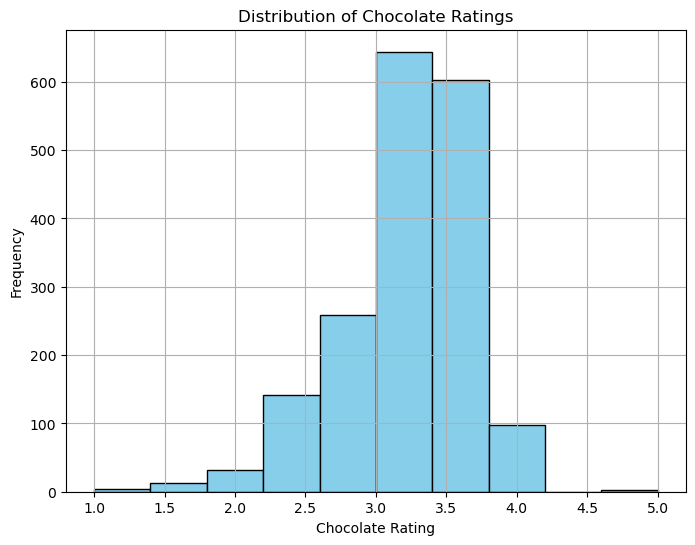

In [1581]:
# Visualise the distribution of food ratings
plt.figure(figsize=(8, 6))
plt.hist(df['rating'], bins=10, color='skyblue', edgecolor='black')
plt.title('Distribution of Chocolate Ratings')
plt.xlabel('Chocolate Rating')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

Chocolate rating of 3 is the highest followed by 3.5 
but what factors causes so to be highly rate while others aren't ?

In [1583]:
df.head()

,company,specific_bean_origin,review_update_value,review_date,cocoa_percentage,company_location,rating,bean_type,bean_origin
0,A. Morin,Agua Grande,1876,2016,63.0,France,3.75,Forastero,Sao Tome
1,A. Morin,Kpime,1676,2015,70.0,France,2.75,Blend,Togo
2,A. Morin,Atsane,1676,2015,70.0,France,3.00,Blend,Togo
3,A. Morin,Akata,1680,2015,70.0,France,3.50,Blend,Togo
4,A. Morin,Quilla,1704,2015,70.0,France,3.50,Blend,Peru


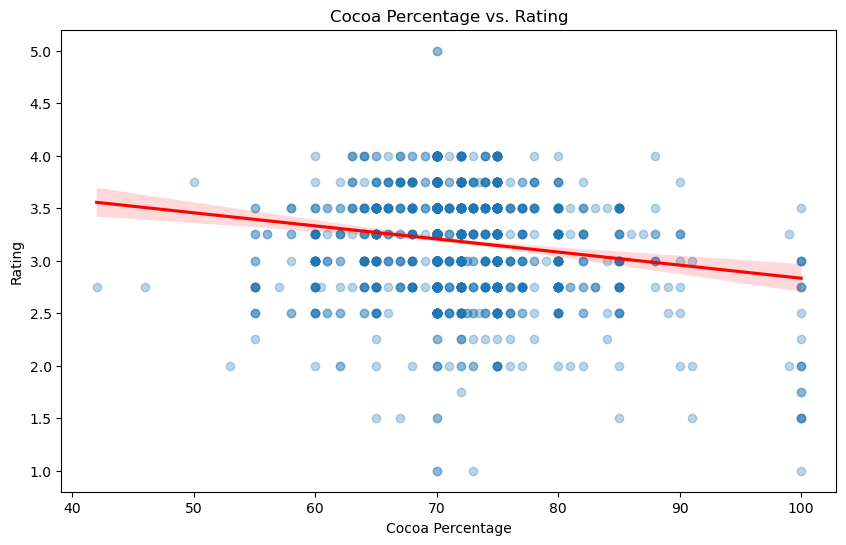

In [1584]:
# Create a scatter plot with regression line
plt.figure(figsize=(10, 6))
sns.regplot(x='cocoa_percentage', y='rating', data=df, scatter_kws={'alpha':0.3}, line_kws={'color':'red'})
plt.xlabel('Cocoa Percentage')
plt.ylabel('Rating')
plt.title('Cocoa Percentage vs. Rating')
plt.show()

- Cocoa percentage of 40% might not have enough cocoa flavours 
- Cocoa percentage of 80% and above will have more bitter taste which will only appeal to certain demographic of customers 
- Cocoa percentage around 70% has the highest rating, this because it has the balance between between the cocoa flavour and sweetness 

- But what's the relationship between rating and the bean type used ? 

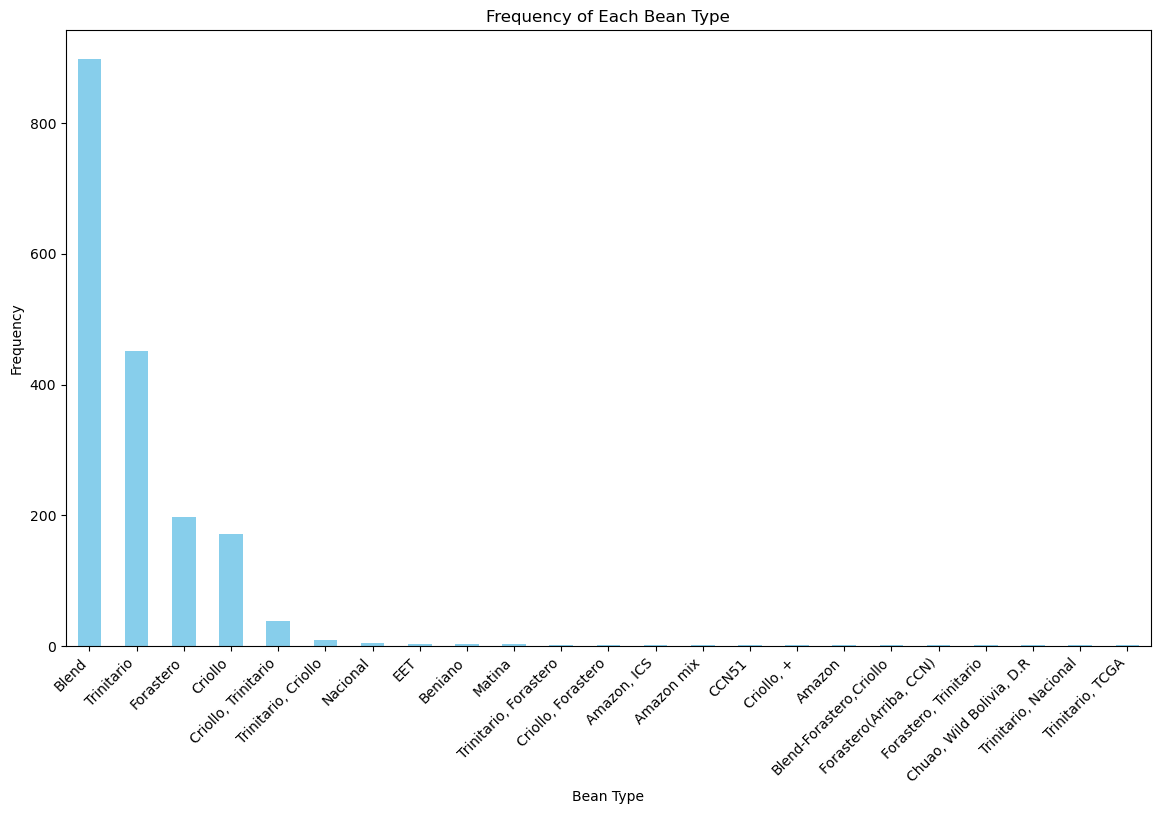

In [1587]:
# Calculate the frequency of each bean type
bean_type_frequency = df['bean_type'].value_counts()
plt.figure(figsize=(14, 8))
bean_type_frequency.plot(kind='bar', color='skyblue')
plt.xlabel('Bean Type')
plt.ylabel('Frequency')
plt.title('Frequency of Each Bean Type')
plt.xticks(rotation=45, ha='right')
plt.show()

- EET is a blend (https://www.c-spot.com/atlas/chocolate-strains/cultivar-strains/eet-62/)
- Amazon is a blend (https://www.c-spot.com/atlas/chocolate-strains/primary-strains/amazon/)
- Matina is single (https://www.c-spot.com/chocolate-census/bars/bar/?pid=182)
- Beniano is single (https://barandcocoa.com/collections/strain-beniano)
- CCN51 is single (https://www.c-spot.com/atlas/chocolate-strains/cultivar-strains/ccn-51/)


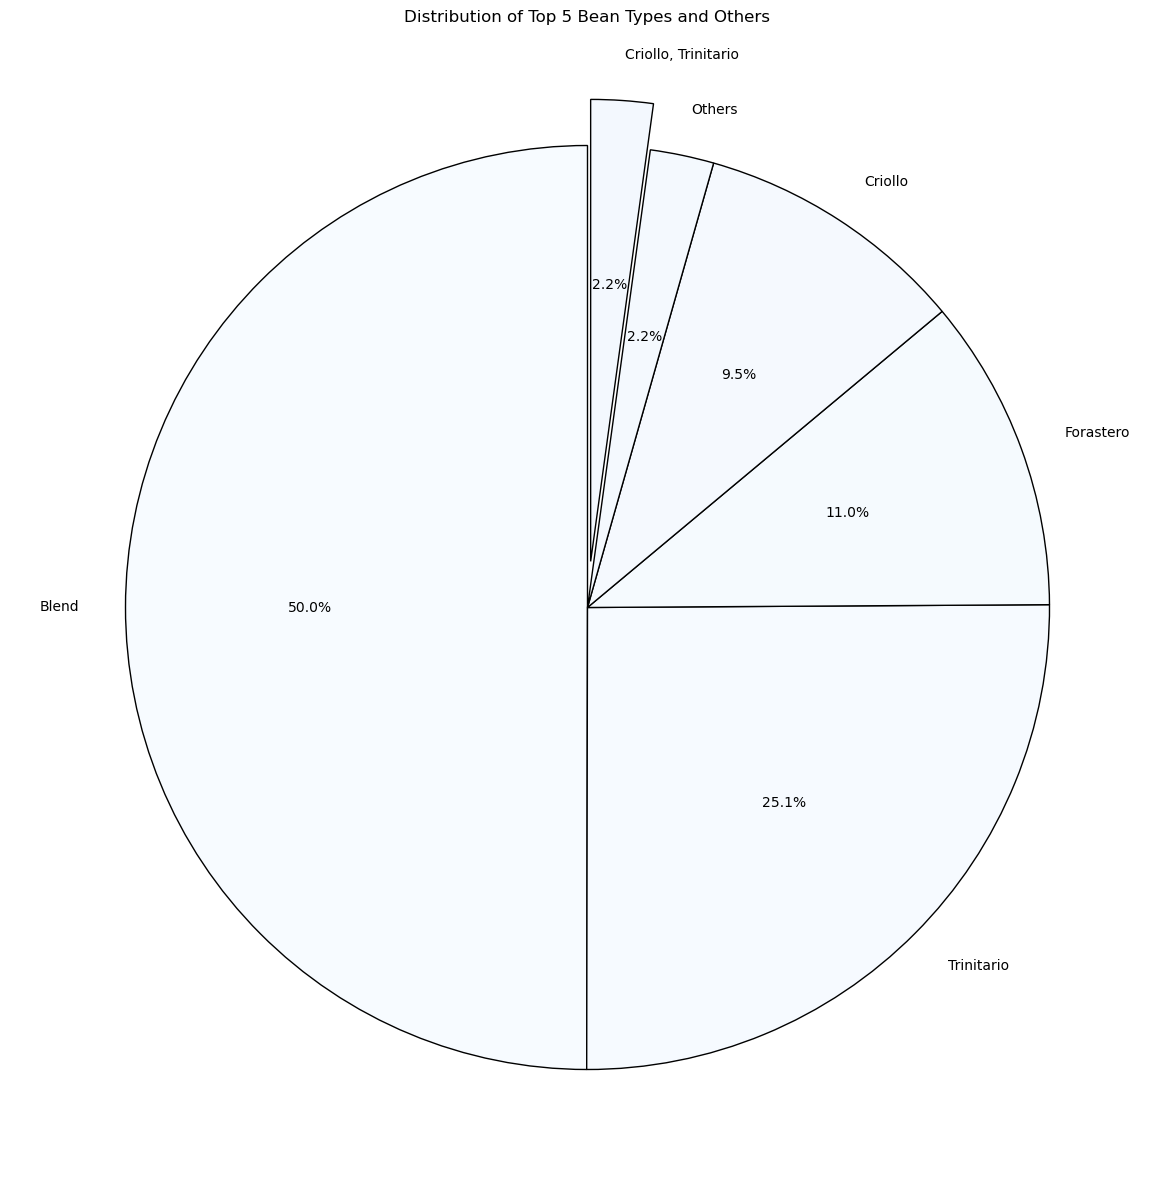

In [1589]:
# Select the top 5 bean types with the highest frequency
top_5_bean_types = df['bean_type'].value_counts().nlargest(5).index.tolist()
df['bean_category'] = df['bean_type'].apply(lambda x: x if x in top_5_bean_types else 'Others')
category_count = df['bean_category'].value_counts()
colors = plt.cm.Blues(range(len(category_count)))
explode = [0.1 if category == 'Criollo, Trinitario' else 0 for category in category_count.index]
plt.figure(figsize=(20, 15))
plt.pie(category_count, labels=category_count.index, autopct='%1.1f%%', startangle=90, colors=colors, wedgeprops=dict(edgecolor='black', linewidth=1), explode=explode)
plt.title('Distribution of Top 5 Bean Types and Others')
plt.show()

- Majority of chocolate are blend and the rest is single origin but what are their ratings? 


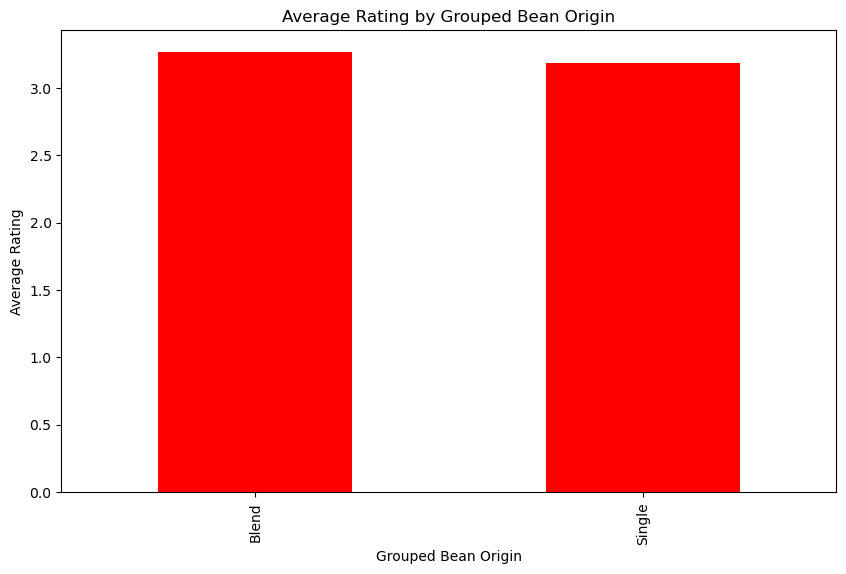

Average Rating for 'Single' group: 3.183743560389239
Average Rating for 'Blend' group: 3.265625


In [1591]:
# Define a function to group bean origins based on conditions
def group_bean_origin(bean_origin):
    if 'Blend' in bean_origin:
        return 'Blend'
    elif 'ETT' in bean_origin:
        return 'ETT'
    elif 'Amazon' in bean_origin:
        return 'Amazon'
    elif ',' in bean_origin:
        return 'Blend'
    else:
        return 'Single'

df['grouped_bean_origin'] = df['bean_origin'].apply(group_bean_origin)

avg_rating_by_group = df.groupby('grouped_bean_origin')['rating'].mean()


plt.figure(figsize=(10, 6))
avg_rating_by_group.plot(kind='bar', color='red')

plt.xlabel('Grouped Bean Origin')
plt.ylabel('Average Rating')
plt.title('Average Rating by Grouped Bean Origin')

plt.show()
single_group = df[df['grouped_bean_origin'] == 'Single']
blend_group = df[df['grouped_bean_origin'] == 'Blend']

avg_rating_single = single_group['rating'].mean()
avg_rating_blend = blend_group['rating'].mean()

print("Average Rating for 'Single' group:", avg_rating_single)
print("Average Rating for 'Blend' group:", avg_rating_blend)

- We can observe that blend has slightly higher average ratings than single probably due to having diverse aroma and flavour profile provided by a blend 
- Therefore, we can conclude chocolate that's a blend and has a cocoa % around 70 has the highest rating overall


- Now let's see where quality cocoa are grown and which countries often import them ?


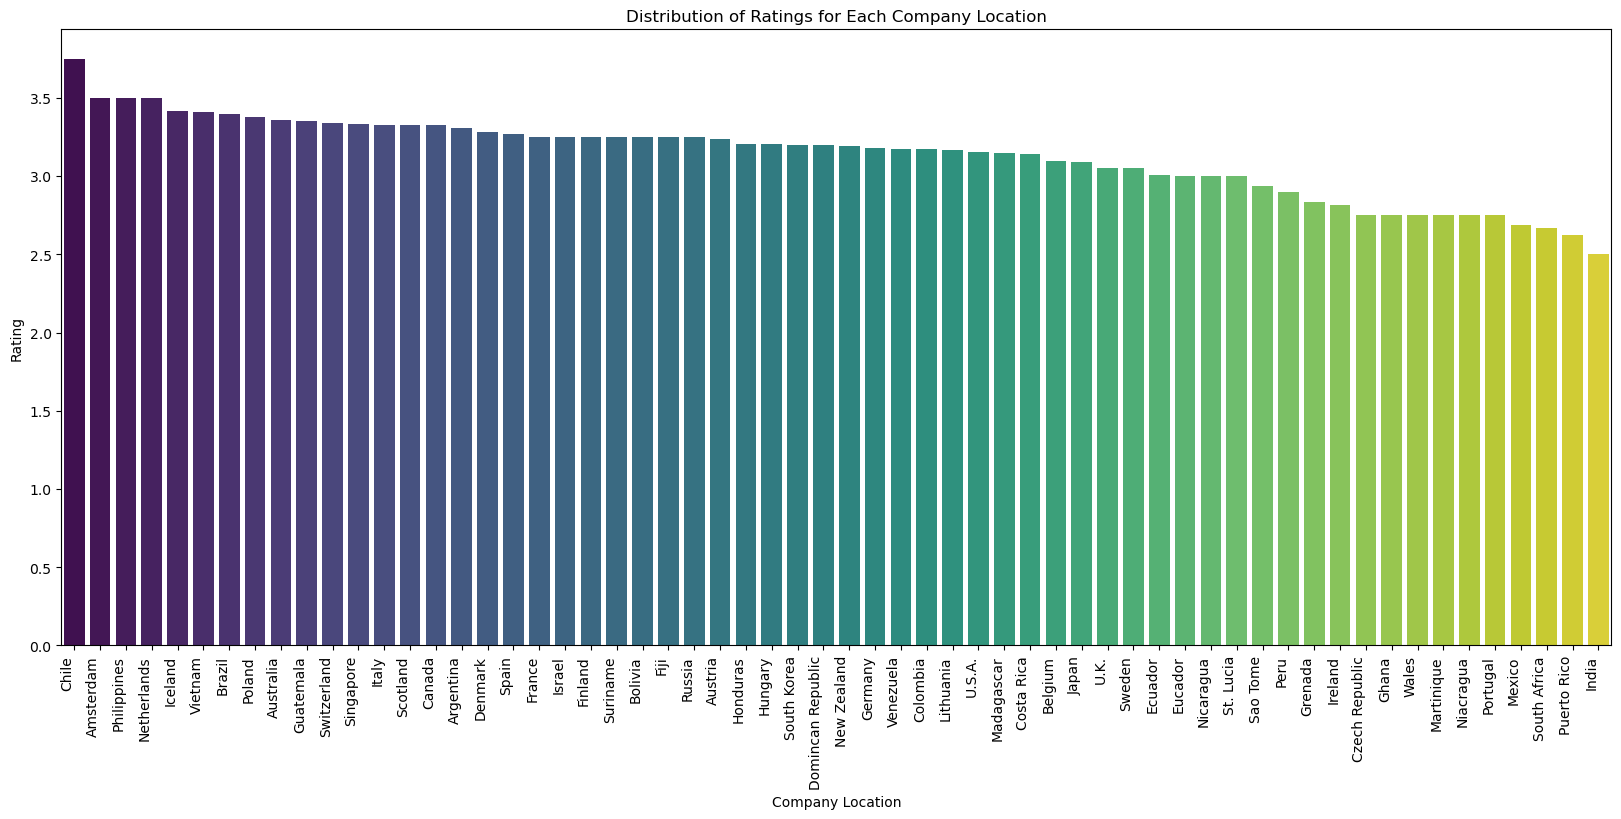

In [1594]:
# Visualise the distribution of ratings for each company_location 

mean_ratings = df.groupby('company_location')['rating'].mean().sort_values(ascending=False)
plt.figure(figsize=(20, 8))
sns.barplot(x='company_location', y='rating', data=df, ci=None, palette='viridis', order=mean_ratings.index)
plt.xlabel('Company Location')
plt.ylabel('Rating')
plt.title('Distribution of Ratings for Each Company Location')
plt.xticks(rotation=90, ha='right')
plt.show()

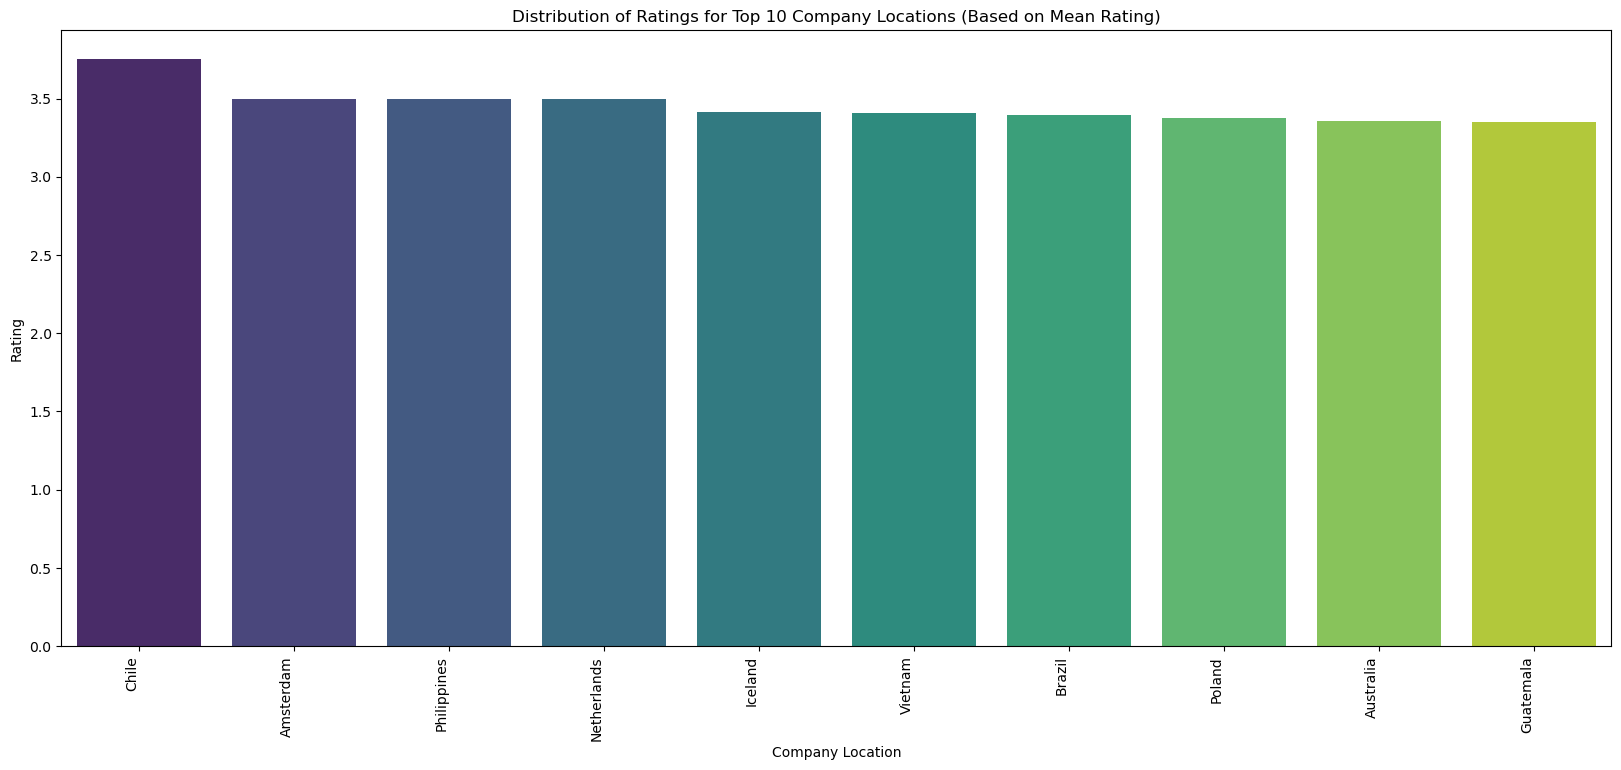

In [1595]:
# Calculate the mean rating for each company_location
mean_ratings = df.groupby('company_location')['rating'].mean().sort_values(ascending=False)
top_10_locations = mean_ratings.head(10).index
filtered_df = df[df['company_location'].isin(top_10_locations)]
plt.figure(figsize=(20, 8))
sns.barplot(x='company_location', y='rating', data=filtered_df, ci=None, palette='viridis', order=top_10_locations)
plt.xlabel('Company Location')
plt.ylabel('Rating')
plt.title('Distribution of Ratings for Top 10 Company Locations (Based on Mean Rating)')
plt.xticks(rotation=90, ha='right')
plt.show()

In [1596]:
import pandas as pd
from tabulate import tabulate

countries = ['Chile', 'Amsterdam', 'Netherlands', 'Philippines', 'Iceland', 'Vietnam', 'Brazil', 'Poland', 'Australia', 'Guatemala']
table_data = []

for country in countries:
    country_df = df[df['company_location'] == country]
    if not country_df.empty:
        unique_bean_origins = ', '.join(country_df['bean_origin'].unique())
        table_data.append([country, unique_bean_origins])
    else:
        table_data.append([country, "No data available"])

table_df = pd.DataFrame(table_data, columns=['Country', 'Unique Bean Origins'])
table_str = tabulate(table_df, headers='keys', tablefmt='pipe', showindex=False)
print(table_str)


| Country     | Unique Bean Origins                                                                                                                                                                                                                                 |
|:------------|:----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------|
| Chile       | Peru                                                                                                                                                                                                                                                |
| Amsterdam   | Dominican Republic, Congo, Peru, South America                                                                                                                                                        

- We can see that countries with the top 10 ratings tend to use South American beans and some of African beans 
- Chile, Amsterdam, Netherlands, Iceland, Poland imports their beans
- Vietnam, Brazil, Philippines uses their domestic beans  
- Guatemala and Australia uses both domestic and imported beans 

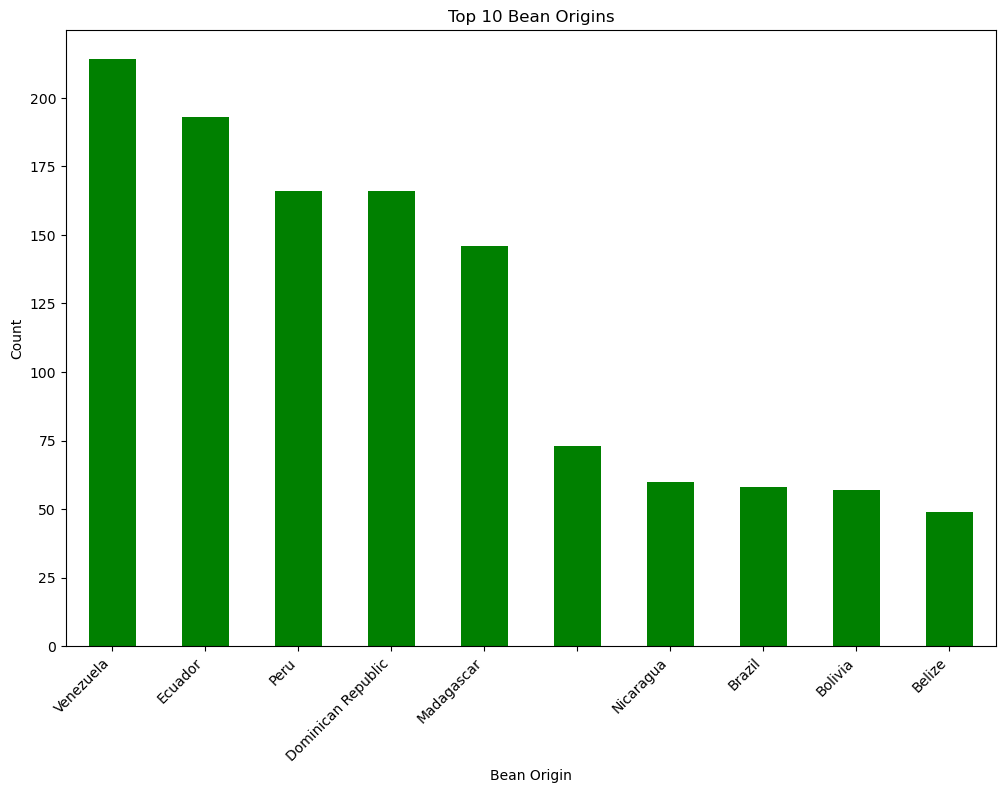

In [1598]:
# Count the occurrences of each unique bean origin
bean_origin_counts = df['bean_origin'].value_counts()
top_n = 10
top_n_bean_origins = bean_origin_counts.head(top_n)
plt.figure(figsize=(12, 8))
top_n_bean_origins.plot(kind='bar', color='green')

plt.title('Top {} Bean Origins'.format(top_n))
plt.xlabel('Bean Origin')
plt.ylabel('Count')

plt.xticks(rotation=45, ha='right')

plt.show()

- Coincidentally, South America is also the biggest exporters of cocoa beans
- Therefore, we can say that top quality chocolate are produced in Chile, Amsterdam, Netherlands, Iceland, Poland, Vietnam, Brazil, Philippines, Guatemala and Australia, where the cocoa beans used are grown in South America, a few in Africa and Asia 


- Now let's see which countries are the biggest importer and how their products performed throughout the year ?

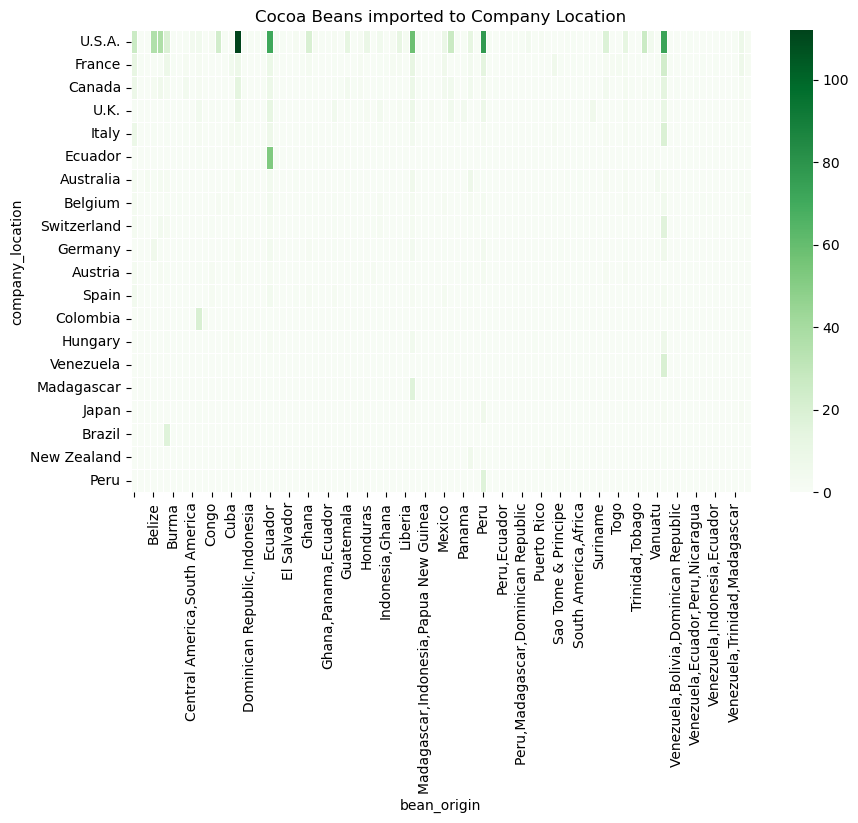

In [1601]:
# Create a cross-tabulation
flow = pd.crosstab(df['company_location'], df['bean_origin'])
flow['tot'] = flow.sum(axis=1)
flow = flow.sort_values('tot', ascending=False)
flow = flow.drop('tot', axis=1)

fig, ax = plt.subplots(figsize=[10, 6])
sns.heatmap(flow.head(20), cmap='Greens', linewidths=.5)
ax.set_title('Cocoa Beans imported to Company Location')

plt.show()

- USA is the biggest cocoa importer, followed by France and Canada 
- Ecuador is the biggest domestic cocoa beans manufacturer

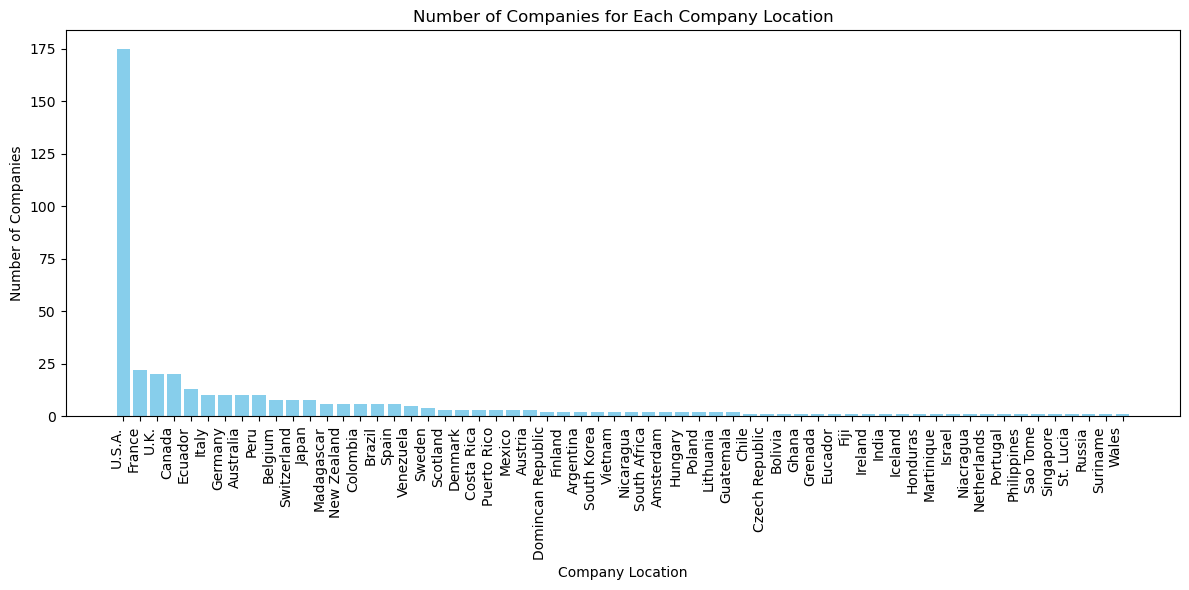

In [1603]:
company_counts = df.groupby('company_location')['company'].nunique().reset_index()

# Sort the DataFrame by the number of companies in descending order
company_counts = company_counts.sort_values(by='company', ascending=False)

# Plotting
plt.figure(figsize=(12, 6))
plt.bar(company_counts['company_location'], company_counts['company'], color='skyblue')
plt.xlabel('Company Location')
plt.ylabel('Number of Companies')
plt.title('Number of Companies for Each Company Location')
plt.xticks(rotation=90, ha='right')  
plt.tight_layout()
plt.show()

- We can also see that the USA followed by France, Canada and UK are the biggest producers of chocolate as many companies operate in their countries

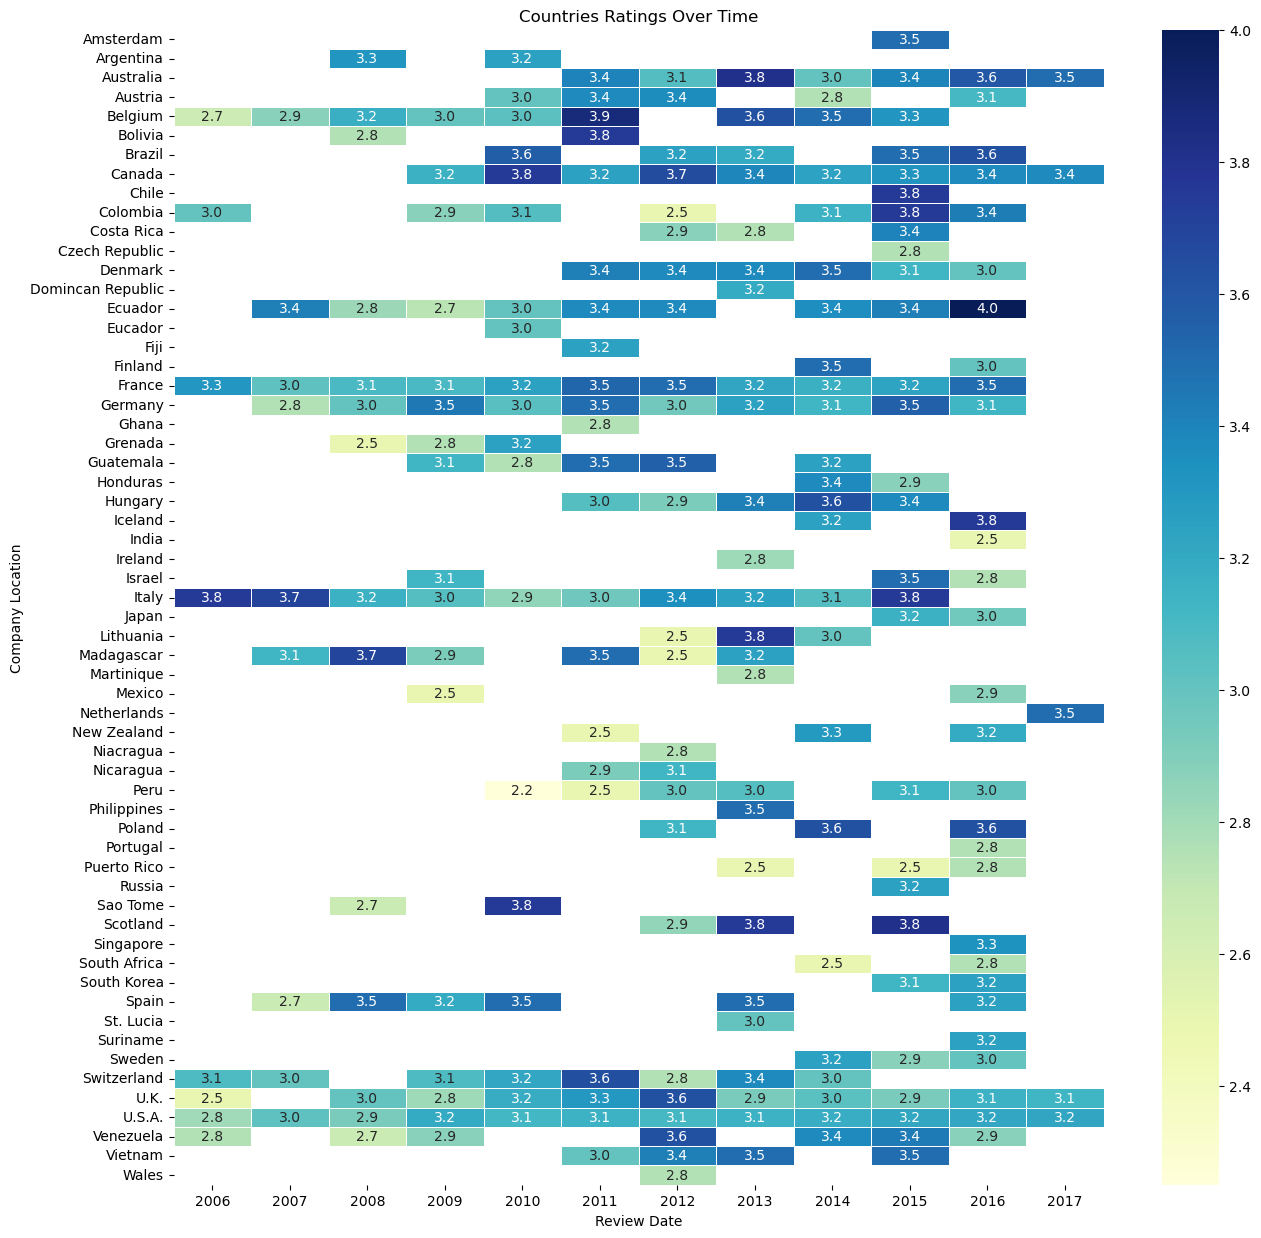

In [1605]:
# Create a pivot table with 'company_location' and 'review_date' as indices
heatmap_data = df.pivot_table(index='company_location', columns='review_date', values='rating', aggfunc='mean')

plt.figure(figsize=(15, 15))
sns.heatmap(heatmap_data, cmap='YlGnBu', annot=True, fmt=".1f", linewidths=.5)
plt.title('Countries Ratings Over Time')
plt.xlabel('Review Date')
plt.ylabel('Company Location')
plt.show()

- USA, UK, Italy, France, Belgium, Ecuador has a solid record of producing chocolate that rated overall 3 or above
- Peru produced the lowest rated chocolates at 2.2 in 2010 
- Ecuador produced the higest rated chocolates at 4.0 in 2016 
- Other countries have sparse amount of data so concluding an access would be inaccurate 

## Reference: 

- https://www.kaggle.com/code/allunia/how-good-does-your-chocolate-taste 
- https://www.kaggle.com/code/tibhar940/chocolate-bar-ratings-python-eda-dataviz/notebook 
